In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization
import seaborn as sns
import matplotlib.pyplot as plt


#Reading the file
telcom = pd.read_csv("C:/Users/HARSH/Documents/My Data/study material/Python/Telecom Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [2]:
#Intial Data Analysis
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Checking the data types of all the columns
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
for item in telcom.columns:
    print(item)
    print (telcom[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [6]:
#Converting Total Charges to Numeric
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors = 'coerce')
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


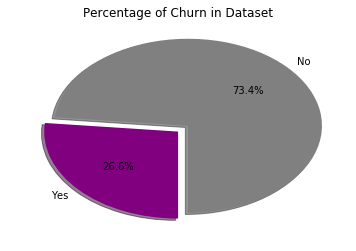

In [8]:
# Data to plot
sizes = telcom['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
explode = (0.1, 0)  # explode 1st slice
labels='No','Yes'
#rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()


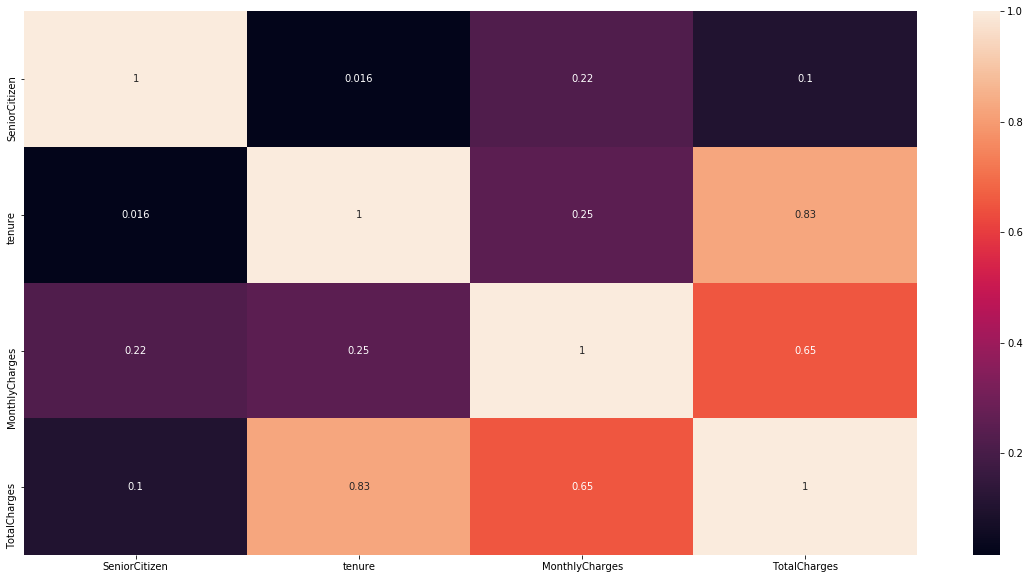

In [8]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(telcom,show_chart=True)
plt.show()

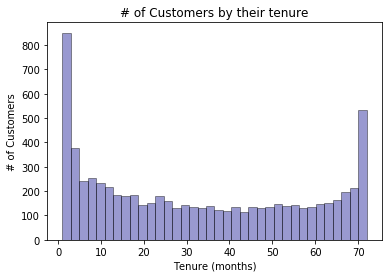

In [9]:
ax = sns.distplot(telcom['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

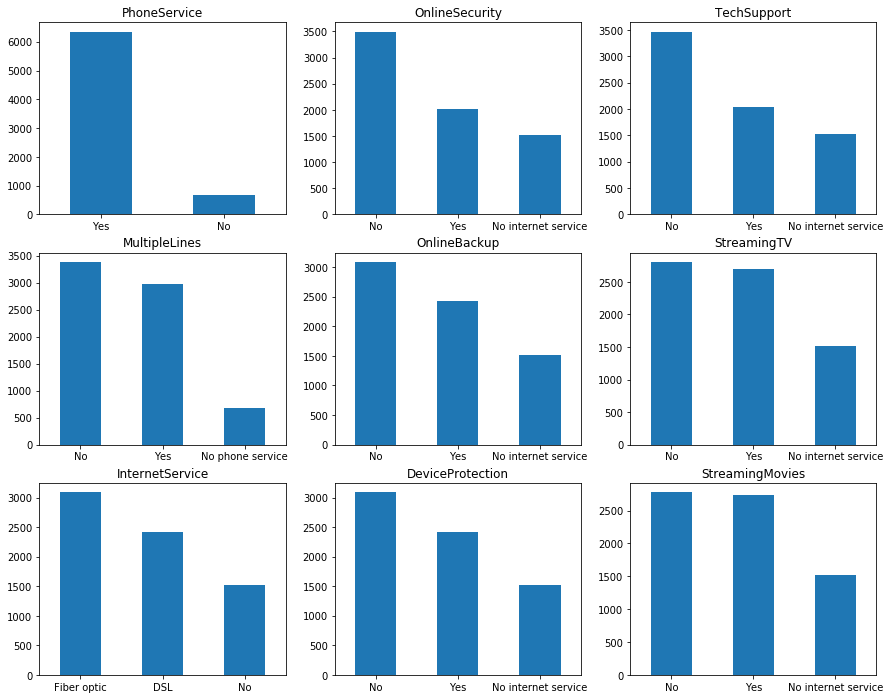

In [11]:
#Services availed by customers 

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telcom[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
plt.show()

In [12]:
df_dummies.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop('Churn',axis=1)

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [13]:
#Logistic Regression
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [15]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


In [17]:
prediction = model.predict(X_train)
# Perform classification report
report = metrics.classification_report(prediction, y_train)
print(report)

             precision    recall  f1-score   support

          0       0.89      0.85      0.87      3772
          1       0.57      0.66      0.61      1150

avg / total       0.81      0.80      0.81      4922



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)
fit_rf.fit(X_train,y_train)

print("accuracy on training set: %f" % fit_rf.score(X_train,y_train))
print("accuracy on test set: %f" % fit_rf.score(X_train,y_train))



accuracy on training set: 0.982756
accuracy on test set: 0.982756


In [21]:
prediction = fit_rf.predict(X_train)
# Perform classification report
report1 = metrics.classification_report(prediction, y_train)
print(report1)

prediction1 = fit_rf.predict(X_test)
# Perform classification report
report2 = metrics.classification_report(prediction1, y_test)
print(report2)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99      4180
          1       0.95      0.99      0.97      1445

avg / total       0.98      0.98      0.98      5625

             precision    recall  f1-score   support

          0       0.90      0.82      0.86      1146
          1       0.43      0.58      0.49       261

avg / total       0.81      0.78      0.79      1407



In [17]:
#The accuracy of the random forest model is really good, but as we can see from the classification report the model is 
#overfitting on the training dataset
#Hyperparameters Optimization
#Utilizing the GridSearchCV functionality
#This will help set the parameters we will use to tune one final parameter: the number of trees in our forest.
from sklearn.model_selection import GridSearchCV
np.random.seed(42)


param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


In [18]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy', 
                  max_depth = 4, n_estimators=1000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
fit_rf.fit(X_train, y_train)

print("accuracy on training set: %f" % fit_rf.score(X_train, y_train))
print("accuracy on test set: %f" % fit_rf.score(X_test, y_test))

accuracy on training set: 0.793600
accuracy on test set: 0.803838


In [40]:
prediction = fit_rf.predict(X_train)
# Perform classification report
report1 = metrics.classification_report(prediction, y_train)
print(report1)

prediction1 = fit_rf.predict(X_test)
# Perform classification report
report2 = metrics.classification_report(prediction1, y_test)
print(report2)


from sklearn.metrics import accuracy_score
fpr, tpr, threshold = metrics.roc_curve(prediction1,y_test)
roc_auc = metrics.auc(fpr, tpr)
print('AUC',roc_auc)

             precision    recall  f1-score   support

          0       0.94      0.81      0.87      4796
          1       0.39      0.71      0.50       829

avg / total       0.86      0.79      0.82      5625

             precision    recall  f1-score   support

          0       0.94      0.82      0.88      1212
          1       0.39      0.70      0.50       195

avg / total       0.87      0.80      0.83      1407

AUC 0.7613480578827113


In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

print("accuracy on training set: %f" % model.score(X_train, y_train))
print("accuracy on test set: %f" % model.score(X_test, y_test))


accuracy on training set: 0.825067
accuracy on test set: 0.811656


C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
# Perform classification report
preds1 = model.predict(X_train)
report1 = metrics.classification_report(preds1, y_train)
print(report1)

preds2 = model.predict(X_test)
report2 = metrics.classification_report(preds2, y_test)
print(report2)

from sklearn.metrics import accuracy_score
fpr, tpr, threshold = metrics.roc_curve(preds2,y_test)
roc_auc = metrics.auc(fpr, tpr)
print('AUC',roc_auc)



             precision    recall  f1-score   support

          0       0.91      0.86      0.88      4395
          1       0.58      0.72      0.64      1230

avg / total       0.84      0.83      0.83      5625

             precision    recall  f1-score   support

          0       0.91      0.85      0.88      1127
          1       0.52      0.66      0.58       280

avg / total       0.83      0.81      0.82      1407

AUC 0.7549356699201419


C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.817067
accuracy on test set: 0.814499


In [37]:
# Perform classification report
preds1 = gbrt.predict(X_train)
report1 = metrics.classification_report(preds1, y_train)
print(report1)

preds2 = gbrt.predict(X_test)
report2 = metrics.classification_report(preds2, y_test)
print(report2)

from sklearn.metrics import accuracy_score
fpr, tpr, threshold = metrics.roc_curve(preds2,y_test)
roc_auc = metrics.auc(fpr, tpr)
print('AUC',roc_auc)


             precision    recall  f1-score   support

          0       0.91      0.85      0.88      4406
          1       0.56      0.70      0.62      1219

avg / total       0.84      0.82      0.82      5625

             precision    recall  f1-score   support

          0       0.91      0.85      0.88      1129
          1       0.52      0.67      0.59       278

avg / total       0.84      0.81      0.82      1407

AUC 0.7596873785294174
